In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_set = pd.read_csv(r"C:\Users\AARSI\Desktop\ML Projects\gld_price_data.csv")

In [4]:
gold_set.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_set.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_set.shape

(2290, 6)

In [7]:
gold_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_set.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_set.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:
  1. positive corr
  2. negative corr

In [10]:
# Drop non-numeric columns
gold_set_numeric = gold_set.select_dtypes(include=[float, int])

# Now calculate correlation
correlation = gold_set_numeric.corr()


# Constructing a heatmap to understand the correlation

<Axes: >

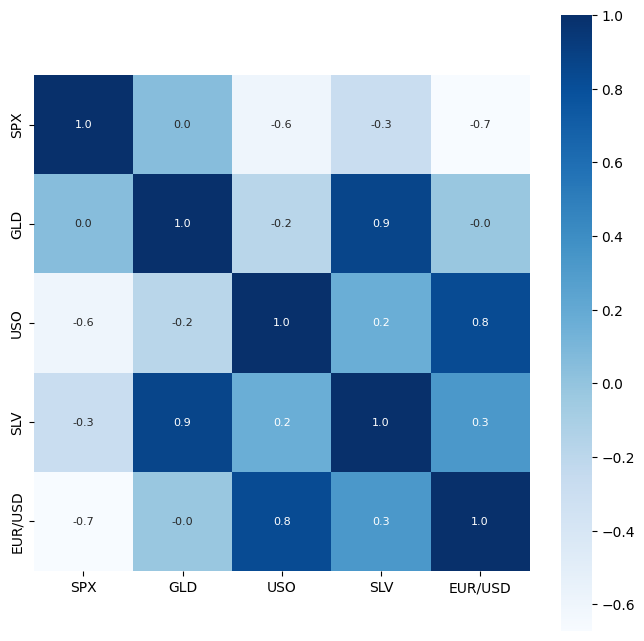

In [11]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation,cbar =True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap ='Blues')

# correlation values of gld

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# Checking the distribution of the GLD Price

C:\Users\AARSI\AppData\Local\Temp\ipykernel_8188\2041558782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_set_numeric['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

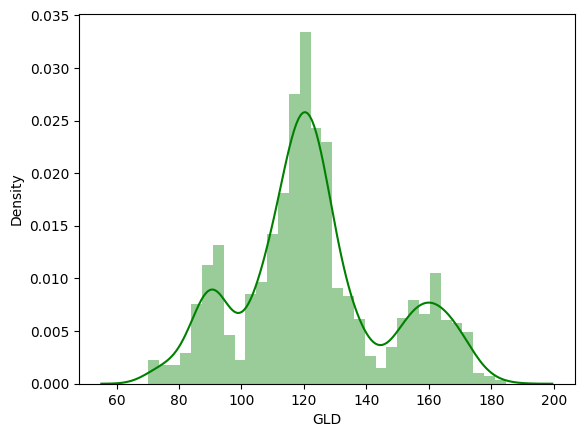

In [15]:
sns.distplot(gold_set_numeric['GLD'],color = 'green')

# Splitting The Feature and Target

In [23]:
X = gold_set_numeric.drop(['Date','GLD'],axis =1,errors='ignore')
Y = gold_set_numeric['GLD']

In [24]:
print(gold_set_numeric.head())

           SPX        GLD        USO     SLV   EUR/USD
0  1447.160034  84.860001  78.470001  15.180  1.471692
1  1447.160034  85.570000  78.370003  15.285  1.474491
2  1411.630005  85.129997  77.309998  15.167  1.475492
3  1416.180054  84.769997  75.500000  15.053  1.468299
4  1390.189941  86.779999  76.059998  15.590  1.557099


In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# SPLITTING INTO TRAINNING DATA AND TEST DATA

In [28]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size =0.2,random_state=2)

# Model Training 
1.RandomForestRegression

In [29]:
regressor=RandomForestRegressor(n_estimators=100)

# training the model

In [30]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

# Prediction on Test Data

In [31]:
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.52259866  82.51169956 116.24880005 127.66680065 120.85780128
 154.6198976  150.23809811 126.33280065 117.35789872 125.92370087
 116.47800082 171.60120056 141.65439941 167.89059814 115.21879994
 117.62220063 138.67520373 170.25900139 159.80720268 161.59909921
 155.18389993 125.24050006 175.86259943 157.18030307 125.3211003
  93.61679939  77.06799988 120.78439983 119.11429923 167.35539961
  88.25780044 125.30389992  91.29810052 117.68679988 121.18069929
 136.58560081 115.60370109 115.19300081 148.4965994  107.29630086
 104.09100249  87.33379806 126.46560074 118.0112999  153.99859914
 119.68629994 108.50820019 108.58159855  93.10110043 127.06619793
  75.13410027 113.65779942 121.29930011 111.33129902 118.984799
 120.74769915 159.56439874 167.32260146 146.98919658  85.67339839
  94.25720031  86.6400991   90.51030006 118.81660101 126.43230041
 127.40710003 169.69180104 122.17959941 117.29019914  99.15080042
 168.3013004  142.98919866 131.97350239 121.19290231 121.84939908
 119.75780037

# R squared error

In [36]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.9900213485948002


In [ ]:
# 120 range of data having these error is good in category considered
but if we are having less data 1 - 12 range of data then these error is large...

# compare the actual values and predicted values in a plot

In [37]:
Y_test =list(Y_test)

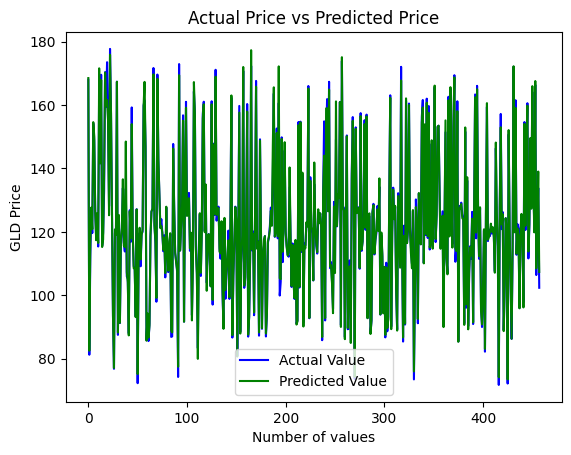

In [38]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color ='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# END